<a href="https://colab.research.google.com/github/chewzzz1014/DPhi-Bootcamp/blob/master/notes/deep-learning/examples/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network**
Reference: https://dphi.tech/notebooks/848/gunnika/convolutional-neural-networks-understanding-cnn-layer-operations?

2 Major Layers in CNN Model:
- Convolutional Layers
- Pooling Layers

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
penguin = ImageOps.grayscale(Image.open("/content/drive/MyDrive/g_disneynaturepenguins_01_17789_d494d9a3.webp"))
penguin_arr = np.array(penguin)

In [ ]:
penguin_arr, penguin_arr.shape

(array([[162, 162, 162, ..., 127, 127, 127],
        [162, 162, 162, ..., 127, 127, 127],
        [163, 163, 163, ..., 127, 127, 127],
        ...,
        [176, 176, 178, ..., 112, 112, 112],
        [176, 175, 180, ..., 111, 111, 111],
        [176, 175, 180, ..., 111, 111, 111]], dtype=uint8), (530, 1136))

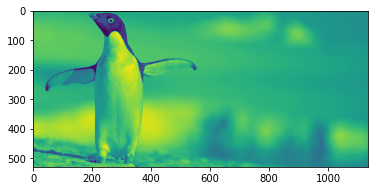

In [ ]:
plt.imshow(penguin_arr)

**Convolutional-2D Layer**

In [14]:
def conv2d(image_arr, conv_filter):
  # copy image
  image_copy = np.copy(image_arr)
  # image dimension
  size_x, size_y = image_copy.shape

  # for each pixel (x, y) in image
  for x in range(1, size_x - 1):
    for y in range(1, size_y-1):
      # convolution ops result
      convolution = 0.0

      # apply convolution on 3x3 patch of image with 3x3 filter kernel
      # Source Image Patch (3x3) Convolution Filter (3x3) New Image - position (x, y)
      # [x-1, y-1] [x, y-1] [x+1, y-1] [f(0,0)] [f(0,1)] [f(0,2)]
      # [x-1, y ] [ x, y ] [x+1, y ] * [f(1,0)] [f(1,1)] [f(1,2)] = [NI(x, y)]
      # [x-1, y+1] [x, y+1] [x+1, y+1] [f(2,0)] [f(2,1)] [f(2,2)]
      convolution = convolution + (image_arr[x-1, y-1] * conv_filter[0][0])
      convolution = convolution + (image_arr[x, y-1] * conv_filter[0][1])
      convolution = convolution + (image_arr[x+1, y-1] * conv_filter[0][2])

      convolution = convolution + (image_arr[x-1, y] * conv_filter[1][0])
      convolution = convolution + (image_arr[x, y] * conv_filter[1][1])
      convolution = convolution + (image_arr[x+1, y] * conv_filter[1][2])

      convolution = convolution + (image_arr[x-1, y+1] * conv_filter[2][0])
      convolution = convolution + (image_arr[x, y+1] * conv_filter[2][1])
      convolution = convolution + (image_arr[x+1, y+1] * conv_filter[2][2])

      filter_wt_sum = np.sum(conv_filter)
      # normalize to make filter weights and add up to 1
      weight = 1 if filter_wt_sum == 0 else 1./filter_wt_sum
      convolution = convolution * weight

      # clip max \ min pixels
      if (convolution<0):
        convolution = 0
      if (convolution<0):
        convolution = 0

      # assign convolution ops result to new image pixel image_copy(x, y)
      image_copy[x, y] = convolution

      return image_copy

      